### Task 4: Spectogram

Subtasks:
1. Add 4th wave packet (frequency = 4 and time_shift = 7 cycles). Demonstrate the effect on the plot of the FFT spectrum
2. Implement the spectrogram, show the effect of 1 on the spectrogram. Don’t forget to label the axies
3. Change the number of time steps in your signal to the power of 2 (i.e. 2**14) and then slightly change the number of timesteps. Measure the timing, can you explain the difference?
4. Implement the parallel version of spectrogram
5. Plot speedup vs the number of processors

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Subtask 1

Add 4th wave packet (frequency = 4 and time_shift = 7 cycles). Demonstrate the effect on the plot of the FFT spectrum

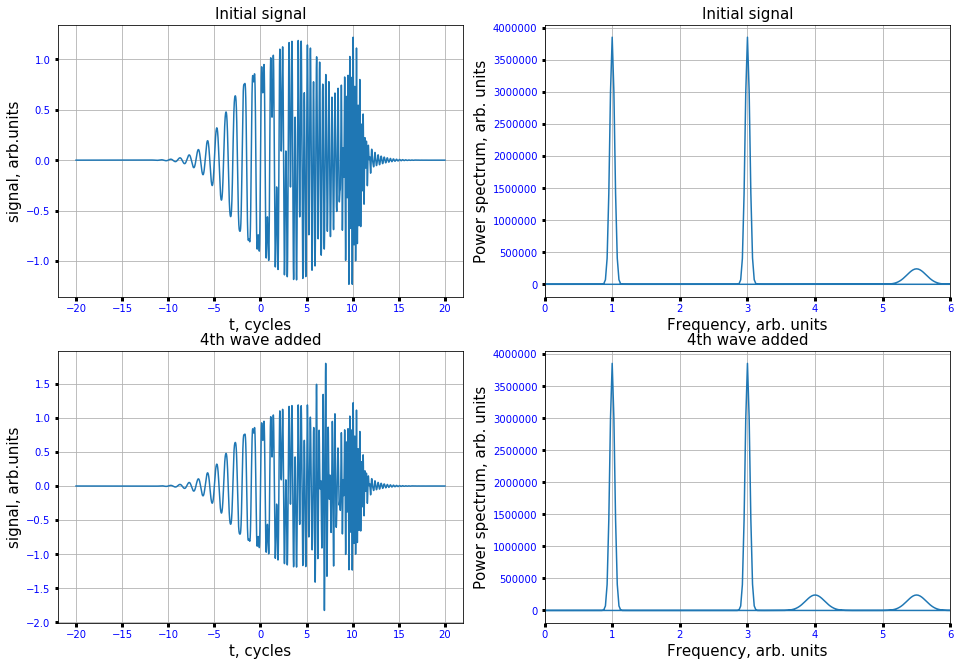

In [20]:
# generate the signal

fig, axs = plt.subplots(2, 2,figsize=(16, 11))
nofts=1000
t=np.linspace(-20*2*pi, 20*2*pi, 2**14+5)
t=np.linspace(-20*2*pi, 20*2*pi, 3**9+6)
y=np.sin(t)*exp(-t**2/2/20**2)
y=y+np.sin(3*t)*exp(-(t-5*2*pi)**2/2/20**2)
y=y+np.sin(5.5*t)*exp(-(t-10*2*pi)**2/2/5**2)

axs[0, 0].plot(t/2/pi,y)
axs[0, 0].set_title('Initial signal', fontsize=15)

axs[0, 0].set_xlabel('t, cycles', fontsize=15)
axs[0, 0].set_ylabel('signal, arb.units', fontsize=15)


# Fourier spectrum
sp=fft.fft(y)
w=fft.fftfreq(len(y), d=(t[1]-t[0])/2/pi)
axs[0, 1].plot(w, abs(sp)**2)
axs[0, 1].set_title('Initial signal', fontsize=15)
axs[0, 1].set_xlim(0,6)
axs[0, 1].set_xlabel('Frequency, arb. units', fontsize=15)
axs[0, 1].set_ylabel('Power spectrum, arb. units', fontsize=15)


#add 4th wave packet frequency = 4 and time_shift = 7 cycles
y1=y+np.sin(4*t)*exp(-(t-7*2*pi)**2/2/5**2)
axs[1, 0].plot(t/2/pi,y1)
axs[1, 0].set_title('4th wave added', fontsize=15)
axs[1, 0].set_xlabel('t, cycles', fontsize=15)
axs[1, 0].set_ylabel('signal, arb.units', fontsize=15)

# Fourier spectrum
sp=fft.fft(y1)
w=fft.fftfreq(len(y1), d=(t[1]-t[0])/2/pi)
axs[1, 1].plot(w, abs(sp)**2)
axs[1, 1].set_title('4th wave added', fontsize=15)
axs[1, 1].set_xlim(0,6)
axs[1, 1].set_xlabel('Frequency, arb. units', fontsize=15)
axs[1, 1].set_ylabel('Power spectrum, arb. units', fontsize=15)
axs[0, 0].tick_params(labelcolor='b', labelsize=10, width=3)
axs[0, 1].tick_params(labelcolor='b', labelsize=10, width=3)
axs[1, 0].tick_params(labelcolor='b', labelsize=10, width=3)
axs[1, 1].tick_params(labelcolor='b', labelsize=10, width=3)

axs[0, 0].grid()
axs[0, 1].grid()
axs[1, 0].grid()
axs[1, 1].grid()

plt.show()


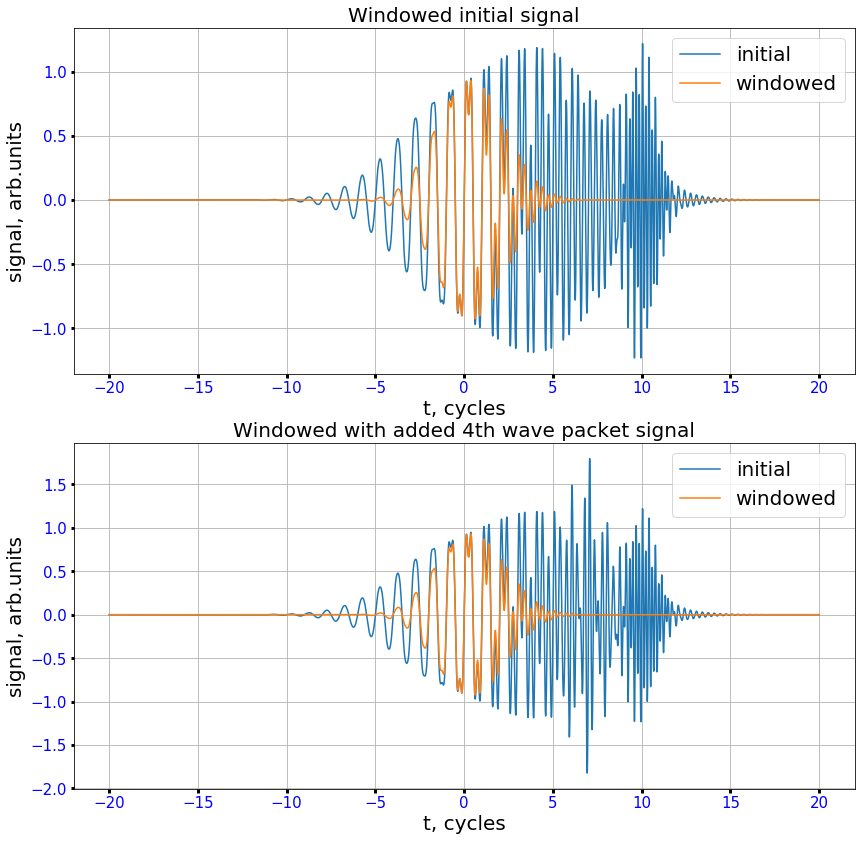

In [3]:
# windowed Fourier transform (Gabor transform, spectrogram)

window_width=2.0*2*pi
window_position=0.0*2*pi
window_function=exp(-(t-window_position)**2/2/window_width**2)

y_window=y * window_function
y1_window=y1 * window_function

fig, (ax1, ax2) = plt.subplots(2, figsize=(14, 14))


ax1.plot(t/2/pi, y, label='initial')
ax1.plot(t/2/pi, y_window, label ='windowed')

ax2.plot(t/2/pi, y1, label='initial')
ax2.plot(t/2/pi, y1_window, label ='windowed')

ax1.set_xlabel('t, cycles',fontsize=20)
ax1.set_ylabel('signal, arb.units',fontsize=20)

ax2.set_xlabel('t, cycles',fontsize=20)
ax2.set_ylabel('signal, arb.units',fontsize=20)

ax1.tick_params(labelcolor='b', labelsize=15, width=3)
ax2.tick_params(labelcolor='b', labelsize=15, width=3)
ax1.set_title('Windowed initial signal',fontsize=20)
ax2.set_title('Windowed with added 4th wave packet signal',fontsize=20)
ax1.legend(loc='upper right', fontsize=20)
ax2.legend(loc='upper right', fontsize=20)

ax1.grid()
ax2.grid()
plt.show()



# now do the same for different window positions and plot 2D graph
# x_axis is window position
# y_axis is frequency
# color axis represents the power spectrum

## Subtask 2

Implement the spectrogram, show the effect of 1 on the spectrogram. Don’t forget to label the axies

In [46]:
def signal(time_step):
    t=np.linspace(-20*2*pi, 20*2*pi, time_step)
    y=np.sin(t)*exp(-t**2/2/20**2)
    y=y+np.sin(3*t)*exp(-(t-5*2*pi)**2/2/20**2)
    y=y+np.sin(5.5*t)*exp(-(t-10*2*pi)**2/2/5**2)
    y=y+np.sin(4*t)*exp(-(t-7*2*pi)**2/2/5**2)
    return np.array(y)

In [50]:
def window(width,position,y): 
    window_function=exp(-(t-position)**2/2/width**2)
    y_window=y * window_function
    return np.array(y_window)

In [73]:
def get_specgram(nwindowsteps,window_width,nofts):
    
    y = signal(nofts)
    windows = linspace(-20*2*pi,20*2*pi,nwindowsteps)
    
    specgram=np.zeros((nofts,nwindowsteps))
    for n,position in enumerate(windows):
        y_windowed = window(window_width,position,y) 
        specgram[:,n]=abs(fft.fft(y_windowed))

    return specgram


In [74]:
w1 = 2.0*2*pi
nw = 1000
nofts = 1000
t=np.linspace(-20*2*pi, 20*2*pi, nofts)
spectogram = get_specgram(nw,w1,nofts)

In [132]:
def plot_spectogram(spectogram,nofts):
    t=np.linspace(-20*2*pi, 20*2*pi, nofts)
    w = fft.fftfreq(len(signal(nofts)), d=(t[1]-t[0])/2/pi)
    
    plt.subplots(figsize=(10, 7))
    imshow(spectogram, origin='lowest', aspect='auto',extent=[-20, 20, y[0], 2 * w[int(len(t)/2)-1]],cmap='inferno')
    colorbar()
    plt.ylim(0,10)
    plt.tick_params(labelcolor='#991199', labelsize=15, width=3)
    
    plt.title("Spectogram", fontsize=20)
    plt.xlabel('Time,cycles', fontsize=20)
    plt.ylabel('Frequency', fontsize=20)
    plt.show()

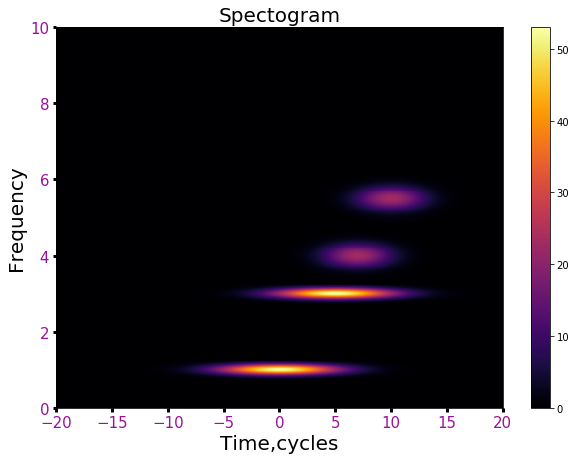

In [133]:
plot_spectogram(spectogram,nofts)

## Subtask 3

Change the number of time steps in your signal to the power of 2 (i.e. 2**14) and then slightly change the number of timesteps. Measure the timing, can you explain the difference?

In [134]:
nofts=2**14
y = signal(nofts)
%timeit sp=fft.fft(y)
nofts +=1
y = signal(nofts)
%timeit sp=fft.fft(y)

434 µs ± 16.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.09 ms ± 15.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


By far the most commonly used FFT is the Cooley–Tukey algorithm. This is a divide and conquer algorithm that recursively breaks down a DFT of any composite size N = N1N2 into many smaller DFTs of sizes N1 and N2, along with O(N) multiplications by complex roots of unity traditionally called twiddle factors. 


The best known use of the Cooley–Tukey algorithm is to divide the transform into two pieces of size N/2 at each step, and is therefore limited to power-of-two sizes, but any factorization can be used in general.

That's why if size of the data is not of the power of 2, it will work slower.


Link: https://en.wikipedia.org/wiki/Fast_Fourier_transform

## Subtask 4

Implement the parallel version of spectrogram


In [ ]:
def signal(time_step):
    t=np.linspace(-20*2*pi, 20*2*pi, time_step)
    y=np.sin(t)*exp(-t**2/2/20**2)
    y=y+np.sin(3*t)*exp(-(t-5*2*pi)**2/2/20**2)
    y=y+np.sin(5.5*t)*exp(-(t-10*2*pi)**2/2/5**2)
    y=y+np.sin(4*t)*exp(-(t-7*2*pi)**2/2/5**2)
    return np.array(y)

In [ ]:
def window(width,position,y): 
    window_function=exp(-(t-position)**2/2/width**2)
    y_window=y * window_function
    return np.array(y_window)

In [ ]:
def get_specgram(nwindowsteps,window_width,nofts):
    
    y = signal(nofts)
    windows = linspace(-20*2*pi,20*2*pi,nwindowsteps)
    
    specgram=np.zeros((nofts,nwindowsteps))
    for n,position in enumerate(windows):
        y_windowed = window(window_width,position,y) 
        specgram[:,n]=abs(fft.fft(y_windowed))

    return specgram

In [ ]:
w1 = 2.0*2*pi
nw = 1000
nofts = 1000
t=np.linspace(-20*2*pi, 20*2*pi, nofts)
spectogram = get_specgram(nw,w1,nofts)

## Subtask 5

Plot speedup vs the number of processors

In [ ]:
def sequential_spect():
    
    

In [ ]:
%%file spectogram_mpi.py

def parallel_spect():
    

In [1]:
import matplotlib.pyplot as plt

In [ ]:
t_seq = %timeit -o sequential_spect()

time = np.zeros(2, dtype="float64")
speedup = np.zeros(2, dtype="float64")

processors = [1, 2]

for team_size in processors:
    t = !mpiexec --allow-run-as-root -n {team_size} python -m mpi4py spectogram_mpi.py
    print(t[0])
    time[team_size-1] = float(t[0])
    speedup[team_size-1] = float(t[0]) / t_seq.best

plt.figure(figsize=(9,8))
plt.plot(processors, speedup)
plt.ylabel('Speedup')
plt.xlabel('Num of Proccessers')
plt.xticks([1,2])
plt.title('Bifurcaiton map')
# plt.legend()
plt.show()